# Bank Customer Churn Analysis

This case study is a part of the Google Data Analytics profissional certificate.

## Ask:

- Problem: <br>
It is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company.

- Goal: <br>
The goal of this analysis is to identify the key reasons and frequency of customers leaving the company, and to explore trends and attempt to find a solution for decreasing customer churn rates. <br>

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.<br>
The dataset used in this case study comes from kaggle, press [here](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) for further information.


## Prepare:
First, I'll start by importing the necessary libraries for completing this project, then I'll import the data.

### Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid

### Data:

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df = df.drop(['RowNumber', 'Surname'], axis = 1)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [4]:
pd.unique(df['Geography'])

array(['France', 'Spain', 'Germany'], dtype=object)

Before we move into the actual analysis, I would like to consider the quality of the data. To do that I will use the ROCCC acronym introduced in the google course:
- **Reliable**: <br> 
Unfortunately, little information is provided on the dataset in its Kaggle page. Therefore, we could say its reliability is unkown. 
- **Original**: <br>
The data does seem to have been collected by the bank itself though. So, I would assume it indeed is original.
- **Comprehensive**: <br>
Based on the data having *10000* records, it seems to be very comprehensive.
- **Current**: <br>
The data has last been updated on 2022, therefore it isn't current.
- **Cited**: <br>
As has already been said, the origin of the data is not declared in the Kaggle page, so it is not cited. <br>

That would emply that the data's quality isn't great.


## Process and Analyse:
since the data seems to already be clean, it would be unnecessary to have an entire step for processing the data. Therefore, I decided to join processing of the data with the analysis. 

Our key metric will be churn rate in %. This will be messured over different geographic locations and for customers who had different experiences with the bank.

In [5]:
TotalChurn = round(np.sum(df['Exited'])/df.shape[0],3)*100
print("The total churn rate is: ", TotalChurn, "%")

The total churn rate is:  20.4 %


### Geographic analysis

In [6]:
GeographicChurn = df[['Geography', 'Exited']].groupby('Geography').sum()
GeographicChurn['ChurnRate']= round(GeographicChurn['Exited']/(df['Geography'].value_counts()),3)*100
GeographicChurn

,Exited,ChurnRate
Geography,,
France,811,16.2
Germany,814,32.4
Spain,413,16.7


In [7]:
GeographicComplain = df[['Geography', 'Complain']].groupby('Geography').sum()
GeographicComplain['ComplainFreq'] = round(GeographicComplain['Complain']/df['Geography'].value_counts(),3)*100
GeographicComplain

,Complain,ComplainFreq
Geography,,
France,812,16.2
Germany,819,32.6
Spain,413,16.7


Firstly, it is very clear that clients from germany leave the bank far more frequently. The fact that the complain frequency is almost identical to the Churn rate shows a clear relationship. Indicating that clients who complain may not be having their issues resolved.

### Age & Tenure analysis

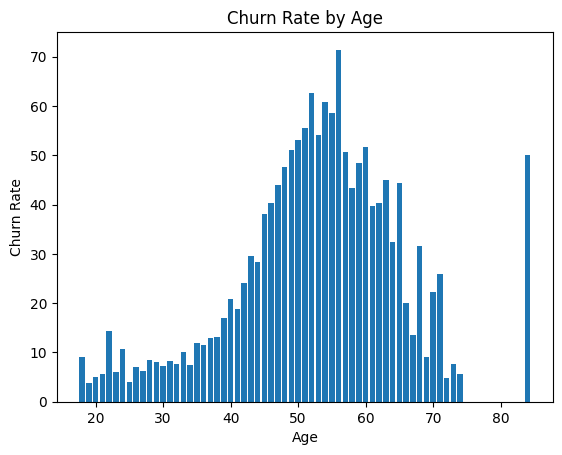

In [8]:
AgeChurn = (df[['Age', 'Exited']].groupby('Age').sum())
AgeChurn = AgeChurn[AgeChurn['Exited']!=0]
AgeChurn['ChurnRate']= round(AgeChurn['Exited']/(df['Age'].value_counts()),3)*100
AgeChurn = AgeChurn.reset_index()

plt.bar(AgeChurn['Age'],AgeChurn['ChurnRate'])
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age')
plt.show()

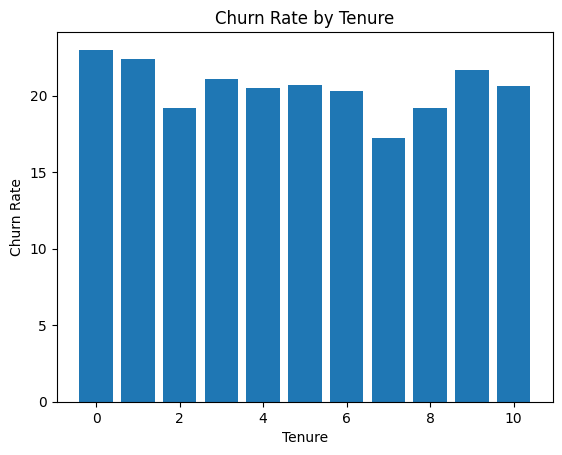

In [9]:
TenureChurn = (df[['Tenure', 'Exited']].groupby('Tenure').sum())
TenureChurn = TenureChurn[TenureChurn['Exited']!=0]
TenureChurn['ChurnRate']= round(TenureChurn['Exited']/(df['Tenure'].value_counts()),3)*100
TenureChurn = TenureChurn.reset_index()

plt.bar(TenureChurn['Tenure'],TenureChurn['ChurnRate'])
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.show()

We saw that clients between the ages of 40 to 65 left the bank far more often than other age ranges. We also saw that Churn rate isn't affected by tenure.

### Behavioral analysis of clients

First we check to see the relationship between a member being active and the churn rate.

In [10]:
ActiveChurn = (df[['IsActiveMember', 'Exited']].groupby('IsActiveMember').sum())
ActiveChurn = ActiveChurn[ActiveChurn['Exited']!=0]
ActiveChurn['ChurnRate']= round(ActiveChurn['Exited']/(df['IsActiveMember'].value_counts()),3)*100
ActiveChurn

,Exited,ChurnRate
IsActiveMember,,
0,1303,26.9
1,735,14.3


It is clear that inactive members are twice as likely to leave the bank.

Now, we will check to see if there is any relationship between the number of products owned by a member and the frequency of members leaving the bank.

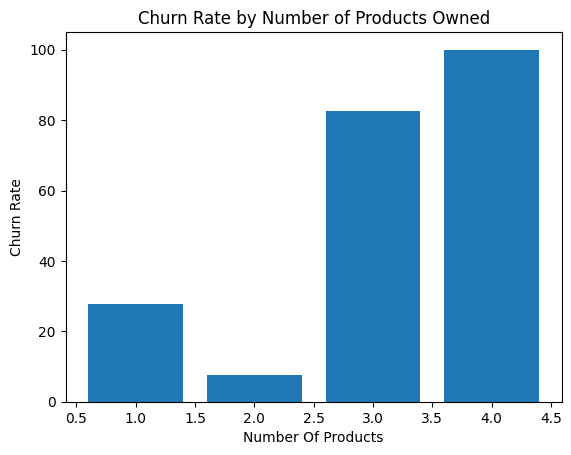

In [11]:
ProdChurn = (df[['NumOfProducts', 'Exited']].groupby('NumOfProducts').sum())
ProdChurn['ChurnRate']= round(ProdChurn['Exited']/(df['NumOfProducts'].value_counts()),3)*100
ProdChurn = ProdChurn.reset_index()

plt.bar(ProdChurn['NumOfProducts'],ProdChurn['ChurnRate'])
plt.xlabel('Number Of Products')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Products Owned')
plt.show()

It seems that about a third of clients with one product leave the bank. On the other hand, less than a tenth of clients with two products leave the bank. That may be because clients with a single product are less dependent on the services of the bank than those with two products. <br>
The Churn rate of customers with 3 and 4 products, however, is surprisingly high. That might be due to these products being underdeveloped or perhaps the clients don't want to be buying 3 or 4 different products and would rather buy a single one. Eitherway, more information is required to find this out.

### Advanced Analysis of the set

First, I will one-hot encode our catigorical feilds and drop the necessary feilds to be able to apply machine learning to the dataset:

In [12]:
ohe = OneHotEncoder()
fa = ohe.fit_transform(df[['Gender','Geography','Card Type']]).toarray()
fl = np.concatenate(ohe.categories_)
features= pd.DataFrame(fa, columns=fl)

In [13]:
dataset = pd.concat([df,features], axis =1)
dataset = dataset.drop(['CustomerId','Gender','Geography','Card Type', 'Exited'], axis=1)
Exited = df['Exited']
dataset_= df.drop(['CustomerId','Gender','Geography','Card Type'], axis=1)

I have made two datasets, with and without the catigorical data. Now, I will utilise a Kmean clustering to try to group similar clients. This could help the bank maintain different types of clients.

In [14]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset_)
    inertias.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

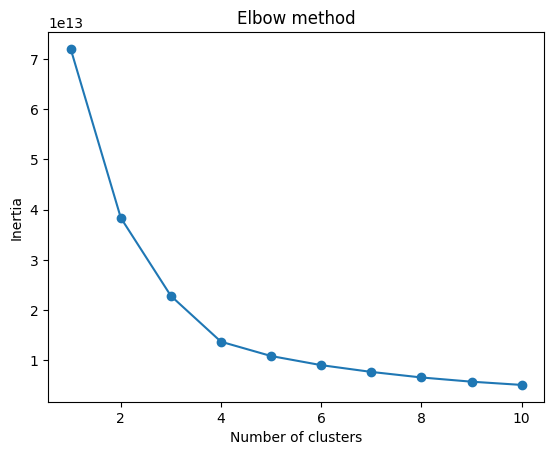

In [15]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It seems like 4 is a fair number of clusters. We will split our data based on it, and save it for further analysis to find similarities between them.

In [16]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset_)
df['Class']=kmeans.labels_
dataset_['Class']=kmeans.labels_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
dataset_.groupby('Class').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
Class,,,,,,,,,,,,
0,651.626549,39.405414,4.961840,121880.264804,1.367906,0.699935,0.513699,50472.479997,0.237443,0.237769,3.037182,605.710372
1,650.080021,38.530858,5.054916,2293.096313,1.770921,0.728033,0.525105,49750.219179,0.138598,0.139121,3.021967,607.305439
2,650.828489,38.988183,5.002555,121953.442609,1.402108,0.694666,0.512935,149744.909055,0.243373,0.244970,2.998084,611.972852
3,648.706504,38.423057,5.069804,2619.445812,1.762031,0.709677,0.510841,149222.657758,0.149656,0.149127,2.993654,597.984135


Seems like the algorithm only grouped them by balance, number of productsm and estimated salary, since the rest is almost identical in values between all the classes. Lets look a bit closer at that.

In [18]:
s = (round(dataset_[['Class','Exited']].groupby('Class').sum()['Exited']/dataset_['Class'].value_counts(),3)*100)
s.name ="ChurnRate"
pd.concat([dataset_[['Class', 'Balance','EstimatedSalary']].groupby('Class').mean(),
           dataset_[['Class', 'NumOfProducts']].groupby('Class').median(),
          s], axis=1)


,Balance,EstimatedSalary,NumOfProducts,ChurnRate
Class,,,,
0,121880.264804,50472.479997,1.0,23.7
1,2293.096313,49750.219179,2.0,13.9
2,121953.442609,149744.909055,1.0,24.3
3,2619.445812,149222.657758,2.0,15.0


It seems like people with a higher balance seem to face more problems in their accounts. That would explain the higher complain and churn rate.

## Share:
This step will be done using tablaue.

## Act:

In the act phase, I create an assisting tool which I think would be useful to stakeholders to figure out which clients are likely to leave the company and take action before losing our clients. The tool will be a neural network trained on historical data and built to predict the likelyhood of a client leaving the bank.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Complain            10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Female              10000 non-null  float64
 12  Male                10000 non-null  float64
 13  France              10000 non-null  float64
 14  Germany             10000 non-null  float64
 15  Spain               10000 non-null  float64
 16  DIAMO

In [20]:
model = Sequential(
    [               
        tf.keras.Input(shape=(20,)),
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='sigmoid')
        
    ]
)

In [21]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    dataset,Exited,
    epochs=50
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - loss: 59.2729
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.6117
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.5649
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - loss: 0.5416
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.5186
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.5178
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 0.5112
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.5066
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.5145
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5140
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 0.5080
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.5090
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.4993
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.5115
Epoch 15/50
313/313 ━━━━━━━━

Now, the network has been trained and is ready to predict our data for us.